# Introduction
This Jupyter notebook aims to answer 3 main questions:

1- Does Education Level Influence Salary Scale?

2- What are the most used programming languages by professional developers?

3- Which country pays the maximum salary for professional developers?

The dataset is obtained from stack overflow 2017 survey:
https://www.kaggle.com/stackoverflow/so-survey-2017

# Business Understanding

In [1]:
# import the necessary packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# read the data
df = pd.read_csv("survey_results_public.csv")
schema = pd.read_csv('survey_results_schema.csv')

copy = df.copy(deep=True)

#display the data
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Understanding

In [3]:
# return dataframe grouped by mean
def grouping_function(data, column_name):
    """ 
    SUMMARY: 
            Returns a grouped dataframe
    
    INPUT: 
            data (object): 2-D Dataframe
            column_name (char): Column which is to be grouped by
  
    Returns: 
            GroupBy object with mean
    """
    
    grouped_df = data.groupby([column_name]).mean().reset_index()
    return grouped_df

# Q1: 
### Does Education Level Influence Salary Scale?

# Data Preparation

In [4]:
result_1 = grouping_function(copy, 'FormalEducation')
result_1[['FormalEducation', 'Salary']]

,FormalEducation,Salary
0,Bachelor's degree,56914.358553
1,Doctoral degree,78527.933053
2,I never completed any formal education,44430.660621
3,I prefer not to answer,38284.836141
4,Master's degree,58250.838766
5,Primary/elementary school,62677.337356
6,Professional degree,39503.658863
7,Secondary school,40395.148419
8,Some college/university study without earning ...,55912.810459


# Evaluation
from the results it seems that developers with a Doctoral Degree get the highest salary wich is USD 78527.933053

# Q2
### What are the most used programming languages by professional developers

# Modelling

In [5]:
# visualize the data
def display(df, col, title):
    """ 
    SUMMARY: 
            display a bar
    
    INPUT: 
            data: 2-D Dataframe
            column_name: Column which is to be displayed
            title: title of the bar
  
    Returns: 
            None
    """
    var1 = df[col].value_counts()
    (var1[:10]/df.shape[0]).plot(kind="bar");
    plt.title(title);

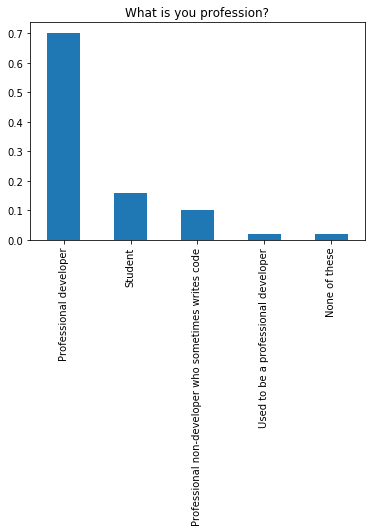

In [6]:
display(df, "Professional", "What is you profession?")

# Data Preparation

In [7]:
# select the needed columns only
df_1 = df[['Professional', 'HaveWorkedLanguage']]

# select the 'Professional developers' only
df_1 = df_1[df_1.Professional == "Professional developer"]
df_1.head(15)

,Professional,HaveWorkedLanguage
2,Professional developer,Java; PHP; Python
4,Professional developer,NaN
7,Professional developer,CoffeeScript; Clojure; Elixir; Erlang; Haskell...
8,Professional developer,C#; JavaScript
9,Professional developer,Objective-C; Swift
11,Professional developer,NaN
13,Professional developer,Java; JavaScript; Ruby; SQL
14,Professional developer,Assembly; C; C++
15,Professional developer,JavaScript; VB.NET
16,Professional developer,JavaScript


# Modeling

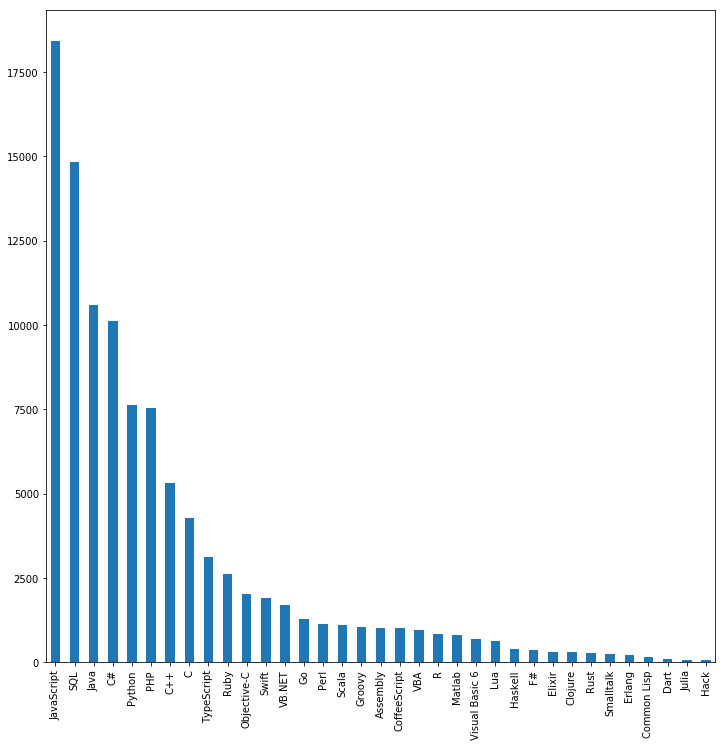

In [8]:
# most programing languages Developers have worked on them before
dev = df_1['HaveWorkedLanguage'].str.split('; ', expand=True).stack().value_counts()
dev.plot(kind="bar", figsize=(12,12))

# Evaluation
As we can see from the plot, the top programming Language used "HaveWorkedLanguage" is JavaScript

# Q3:
### Which country pays the maximum salary for professional developers?

# Data Preparation

In [9]:
# select the needed columns only
df2 = df[['Professional','Country','Salary']]

# select the 'Professional developer' only
df2 = df2[(df2.Professional == "Professional developer")]
df2.head(10)

,Professional,Country,Salary
2,Professional developer,United Kingdom,113750.0
4,Professional developer,Switzerland,NaN
7,Professional developer,Poland,NaN
8,Professional developer,Colombia,NaN
9,Professional developer,France,NaN
11,Professional developer,Canada,NaN
13,Professional developer,Germany,NaN
14,Professional developer,United Kingdom,100000.0
15,Professional developer,United States,NaN
16,Professional developer,United Kingdom,NaN


# View the number of missing values in Salary column

In [10]:
df2.Salary.isnull().sum()

23240

In [11]:
# There are 23240 rows with 'Nan' value in the Salary column, we need to fill them with the mean to get a more accurate results.

In [12]:
 # handeling  missing values in Salary column by using the mean
df2['Salary'].fillna((df2['Salary'].mean()), inplace=True)
df2.head()

,Professional,Country,Salary
2,Professional developer,United Kingdom,113750.000000
4,Professional developer,Switzerland,56298.480641
7,Professional developer,Poland,56298.480641
8,Professional developer,Colombia,56298.480641
9,Professional developer,France,56298.480641


# Modeling

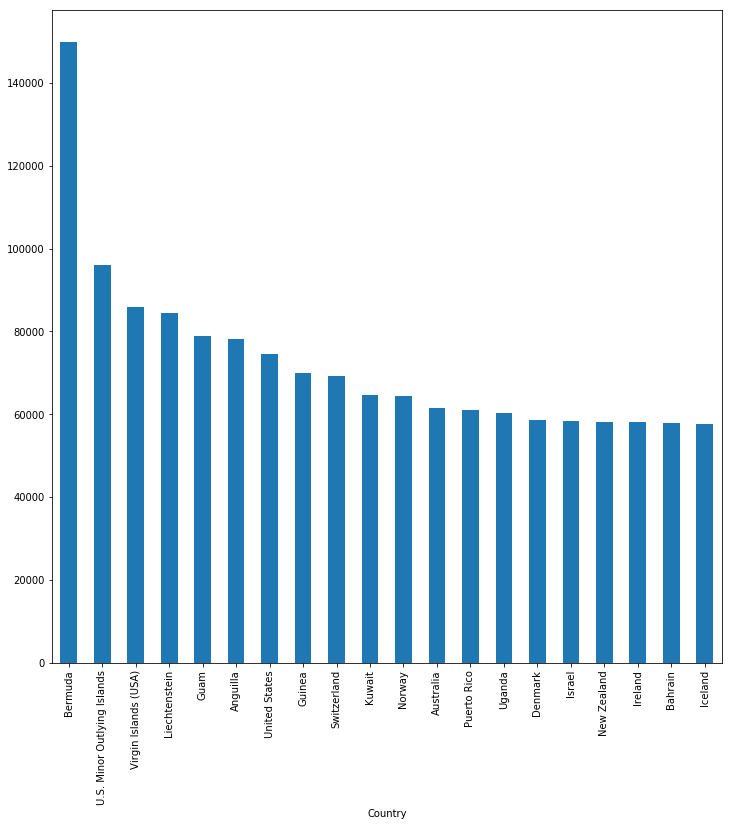

In [13]:
# plot the mean Salary
df2_forplot = df2.groupby(['Country']).mean()['Salary'].sort_values(ascending = False)
df2_forplot[:20].plot(kind="bar", figsize=(12,12))


In [14]:
df2_forplot.head()

Country
Bermuda                        150000.00000
U.S. Minor Outlying Islands     96149.24032
Virgin Islands (USA)            85973.86048
Liechtenstein                   84399.62016
Guam                            78800.00000
Name: Salary, dtype: float64

# Evaluation
As it seems that the country that has highest salary for professional develpers is Bermuda.